## Importation des packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale
import operator
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor 

c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importation des données

In [6]:
enedis_IDF=pd.read_csv("Données/data_conso_moyenne/data_conso_6kva_IDF.csv",sep=",")
enedis_HDF=pd.read_csv("Données/data_conso_moyenne/data_conso_6kva_HDF.csv",sep=",")
enedis_PACA=pd.read_csv("Données/data_conso_moyenne/data_conso_6kva_PACA.csv",sep=",")

enedis_IDF.dropna(inplace=True)
enedis_PACA.dropna(inplace=True)
enedis_HDF.dropna(inplace=True)

## Contexte

Dans l'ensemble du projet nous comparerons trois régions différentes : 

- Hauts de France (HDF),
- Ile de France (IDF),
- et Provence Alpes Côtes d'Azur (PACA)

## Corrélation entre consommation moyenne et température

#### Ile de France

Text(0.5, 1.0, "Consommation moyenne de l'énergie soutirée en fonction de la température en IDF")

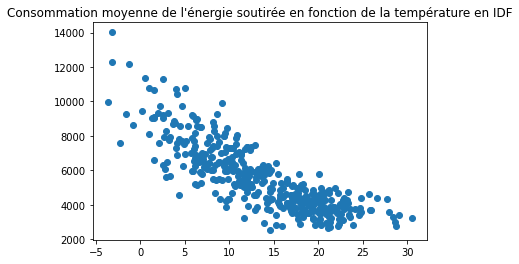

In [7]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.scatter(enedis_IDF["tmoy"],enedis_IDF["conso_totale_moyenne"])

plt.title("Consommation moyenne de l'énergie soutirée en fonction de la température en IDF")


#### PACA

Text(0.5, 1.0, "Consommation moyenne de l'énergie soutirée en fonction de la température")

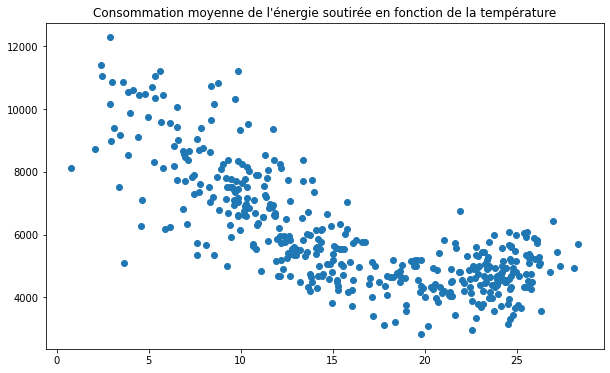

In [8]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.scatter(enedis_PACA["tmoy"],enedis_PACA["conso_totale_moyenne"])
plt.title("Consommation moyenne de l'énergie soutirée en fonction de la température")

On voit ici que la consommation moyenne augmente à partir de 20°C.

#### Hauts de France

Text(0.5, 1.0, "Consommation moyenne de l'énergie soutirée en fonction de la température")

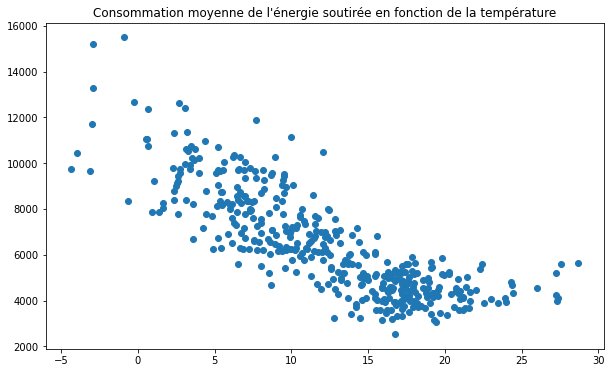

In [9]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.scatter(enedis_HDF["tmoy"],enedis_HDF["conso_totale_moyenne"])
plt.title("Consommation moyenne de l'énergie soutirée en fonction de la température")

## Regression linéaire de la conso moyenne en fonction de la tempérautre

Objectif : Prédiction du de la consommation moyenne soutirée par journée en fonction de la température de la journée sur une région particulière

### Standardisation des données

In [10]:
enedis_IDF["tmoy_scaled"]=scale(enedis_IDF["tmoy"])
enedis_HDF["tmoy_scaled"]=scale(enedis_HDF["tmoy"])
enedis_PACA["tmoy_scaled"]=scale(enedis_PACA["tmoy"])

### Création de nos échantillons

In [17]:
def decoupe (bdd_region):

    X=bdd_region[["tmoy"]]
    Y=bdd_region[["conso_totale_moyenne"]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    return (X,Y, X_train, X_test, Y_train, Y_test)

In [18]:
## Création des échantillons d'apprentissages et de tests

X_IDF,Y_IDF , X_train_IDF, X_test_IDF, Y_train_IDF, Y_test_IDF =decoupe(enedis_IDF)
X_PACA,Y_PACA , X_train_PACA, X_test_PACA, Y_train_PACA, Y_test_PACA =decoupe(enedis_PACA)
X_HDF,Y_HDF , X_train_HDF, X_test_HDF, Y_train_HDF, Y_test_HDF =decoupe(enedis_HDF)

### Régression sur l'échantillon d'apprentissage

In [13]:
X_IDF.loc[X_IDF['tmoy_scaled'].isna(),:]


,tmoy_scaled


On utilise ici le package sklearn pour effectuer nos régressions.

In [19]:
## Création de la fonction de régression utilisant sklearn 

def reg_sklearn(X_train,Y_train,X_test,Y_test,df_region,region):
    
    model = LinearRegression()
    results=model.fit(X_train,Y_train)

    coeff=results.coef_[0][0]
    intercept=results.intercept_[0]

    R2=model.score(X_train,Y_train)

    Y = df_region["conso_totale_moyenne"].to_numpy()
  
    Y_predicted = model.predict(X_test)


    # Évaluation du modèle
    rmse = mean_squared_error(Y_test, Y_predicted)
    r2 = r2_score(Y_test, Y_predicted)
    # Affichage des valeurs
    print("Pente : " ,coeff)
    print("Ordonnée à l'origine : ", intercept)
    print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
    print('Sccore R2 : ', r2)
    
    # Tracée des valeurs
    # Points de données
    plt.figure(figsize=(20, 8))
    plt.scatter(enedis_IDF["tmoy"], Y, s=10)
    plt.xlabel('Température moyenne standardisée')
    plt.ylabel("Consommation d'energie moyenne par pt de soutirageen Watt")
    plt.title("Regression linéaire de la conso moyenne sur la température pour la région "+region)
    # Valeurs prédites
    plt.scatter(X_test, Y_predicted, color='r')
    plt.show()

    return (coeff,R2,intercept)

Pente :  -1632.5697382344426
Ordonnée à l'origine :  5577.183996670582
Racine carrée de l'erreur quadratique moyenne :  1300666.5960347438
Sccore R2 :  0.6106318567319702


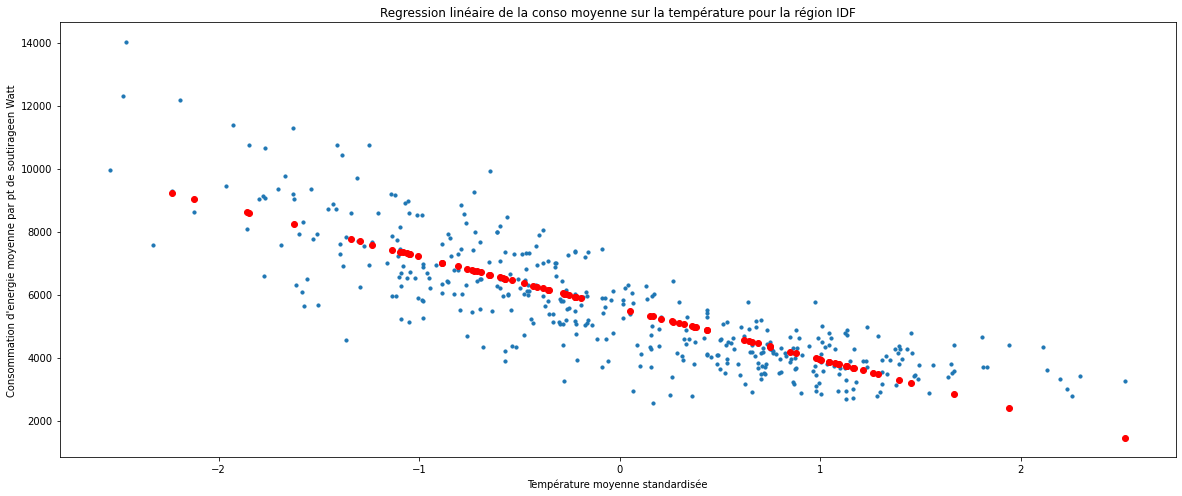

In [15]:
coeff_reg_IDF,R2_IDF,intercept_reg_IDF = reg_sklearn(X_train_IDF,Y_train_IDF,X_test_IDF,Y_test_IDF,enedis_IDF,"IDF")

Pente :  -241.61727232728134
Ordonnée à l'origine :  8838.443260328007
Racine carrée de l'erreur quadratique moyenne :  1300666.596034744
Sccore R2 :  0.6106318567319702


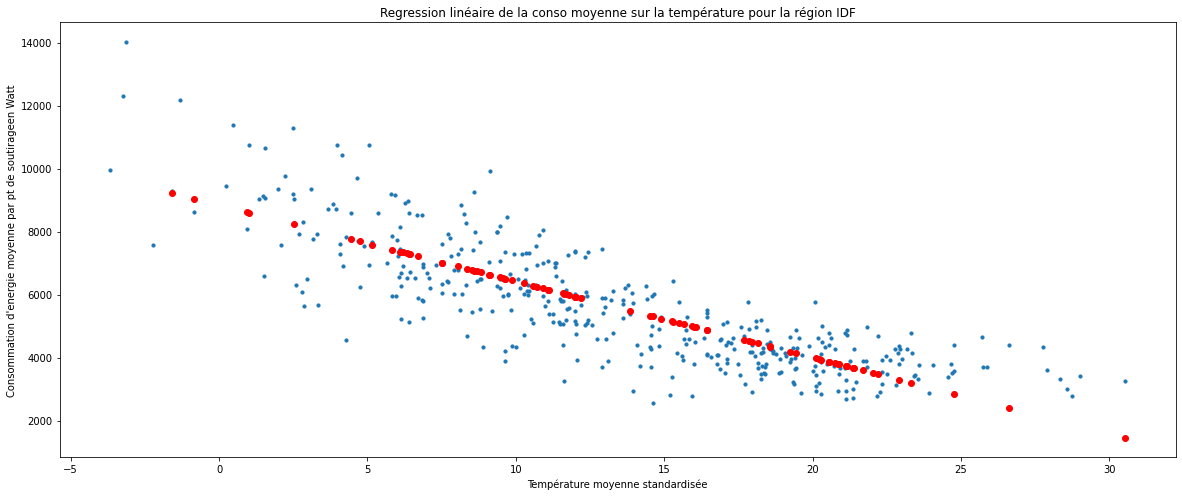

Pente :  -298.9215970583287
Ordonnée à l'origine :  10065.235565717368
Racine carrée de l'erreur quadratique moyenne :  1496498.0555865616
Sccore R2 :  0.6983001972362631


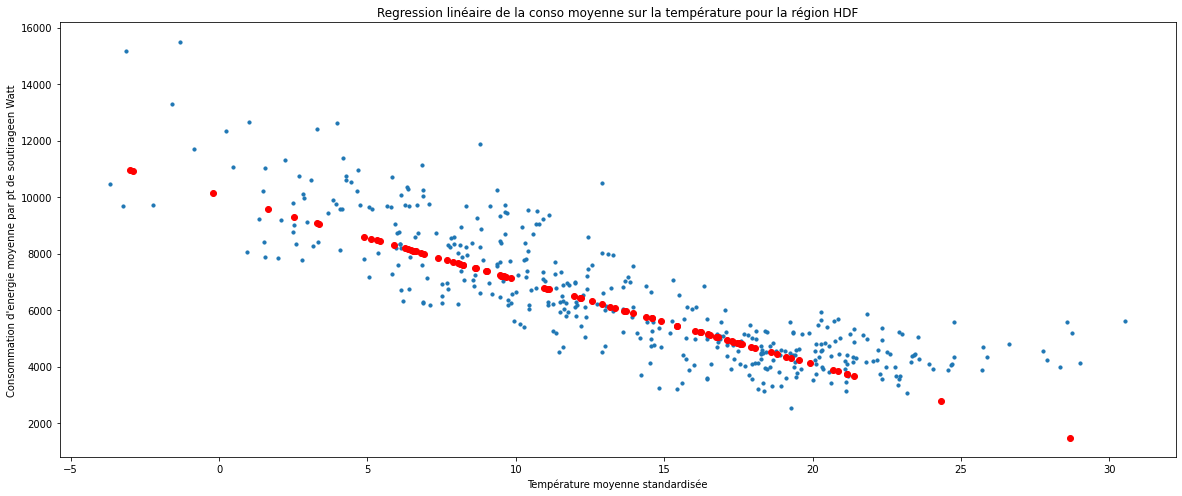

Pente :  -206.94020675320598
Ordonnée à l'origine :  9289.971403719144
Racine carrée de l'erreur quadratique moyenne :  1594269.8630501323
Sccore R2 :  0.48757572471108523


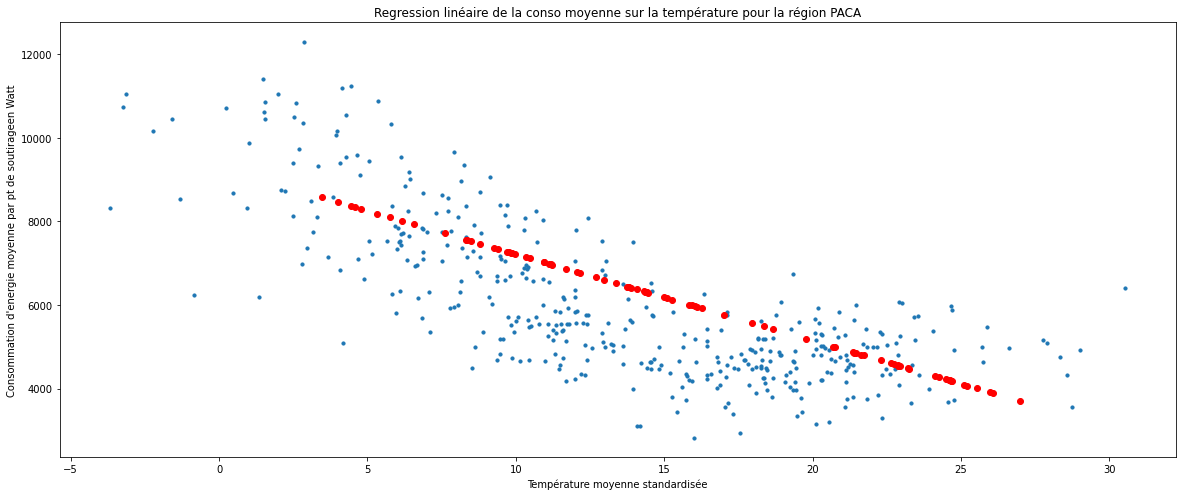

In [21]:
coeff_reg_IDF,R2_IDF,intercept_reg_IDF = reg_sklearn(X_train_IDF,Y_train_IDF,X_test_IDF,Y_test_IDF,enedis_IDF,"IDF")
coeff_reg_HDF,R2_HDF,intercept_reg_HDF = reg_sklearn(X_train_HDF,Y_train_HDF,X_test_HDF,Y_test_HDF,enedis_HDF,"HDF")
coeff_reg_PACA,R2_PACA,intercept_reg_PACA = reg_sklearn(X_train_PACA,Y_train_PACA,X_test_PACA,Y_test_PACA,enedis_PACA,"PACA")


conso_totale_moyenne    422
dtype: int64

### Classification des R2 sur l'échantillon de test

In [22]:
liste_R2 = [R2_IDF,R2_PACA,R2_HDF]
liste_region = ['Île-de-France',"Provence-Alpes-Côte d'Azur",'Hauts-de-France']
d={'liste_region':liste_region,"R2":liste_R2}
R2_regressions_lineaire = pd.DataFrame(d)
R2_regressions_lineaire.sort_values("R2",ascending=False,inplace=True)
R2_regressions_lineaire

,liste_region,R2
0,Île-de-France,0.698043
2,Hauts-de-France,0.678281
1,Provence-Alpes-Côte d'Azur,0.589000


### Classification des coefficients et intervalles de confiance

In [23]:
liste_coeff = [coeff_reg_IDF,coeff_reg_PACA,coeff_reg_HDF]
liste_region = ['Île-de-France',"Provence-Alpes-Côte d'Azur",'Hauts-de-France']
d={'liste_region':liste_region,"coefficient régression":liste_coeff}

coeff_apprentissage = pd.DataFrame(d)
coeff_apprentissage.sort_values("coefficient régression",ascending=False,inplace=True)
coeff_apprentissage

,liste_region,coefficient régression
1,Provence-Alpes-Côte d'Azur,-206.940207
0,Île-de-France,-241.617272
2,Hauts-de-France,-298.921597


In [ ]:
conf_int = pd.concat([conf_int_IDF,conf_int_PACA,conf_int_HDF])
conf_int.columns=["conf_int_down","conf_int_up"]
conf_int=conf_int.reset_index().drop(columns="index")
result_reg = coeff_apprentissage.copy()
result_reg["conf_int_down"]= conf_int["conf_int_down"]
result_reg["conf_int_up"]= conf_int["conf_int_up"]
result_reg

NameError: name 'conf_int_IDF' is not defined

### Conclusion

Interprétation :

Les R2 sont :
Les coefficients sont : à %.
On suppose que l'effet est causal et que l'on peut interpréter causalement les coefficients.

On voit que les coefficients sont négatifs. Ce qui semble cohérent car plus la température augmente plus la consommation moyenne doit diminuer. 

On pourra interpréter comme :

Lorsque la température augmente de 1 °C, la consommation ___.

Problème : 
Ici on remarque que l'on ne prend pas en compte l'effet seuil qui se trouve aux environs de ... °C. Il correspond à ___

Solution : 
Le courbure de la courbe laisse penser qu'une régression polynomiale serait plus efficace pour prédire nos données.

## Régression polynomiale

### Recherche de la fonction polynomial pertinente


In [24]:
## Création de la fonction de visualisation de polynome de différents degrés
def polynomial_plot(feature, label,region):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = np.squeeze(feature)
  y_coordinates = np.squeeze(label)
  # Contruct polynomial function
  quadratic_func2 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
  quadratic_func3 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
  quadratic_func4 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 4))
  quadratic_func5 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 5))
  quadratic_func6 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 6))
  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  #plt.plot(values, linear_func(values), color='red', label='Fonction linéaire')
  plt.plot(values, quadratic_func2(values), color='black', label='Fonction Quadratique (degrés 2)')
  plt.plot(values, quadratic_func3(values), color='orange', label='Fonction Quadratique (degrés 3)')
  plt.plot(values, quadratic_func4(values), color='red', label='Fonction Quadratique (degrés 4)')
  plt.plot(values, quadratic_func5(values), color='cyan', label='Fonction Quadratique (degrés 5)')
  plt.plot(values, quadratic_func6(values), color='green', label='Fonction Quadratique (degrés 6)')
  plt.xlabel('température moyenne standardisée ')
  plt.ylabel('Conso moyenne (wh) ')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Fonction Quadratique sur base d'apprentissage pour la région "+region)
  plt.show()  

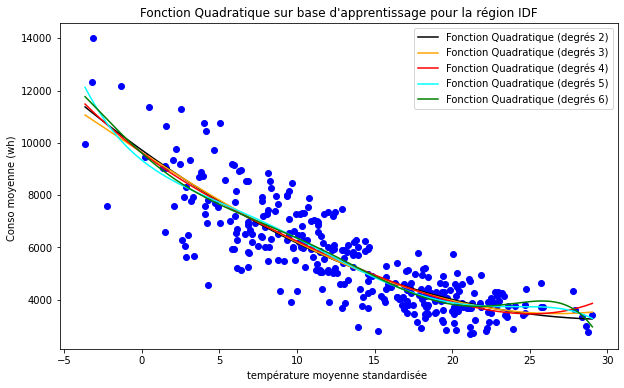

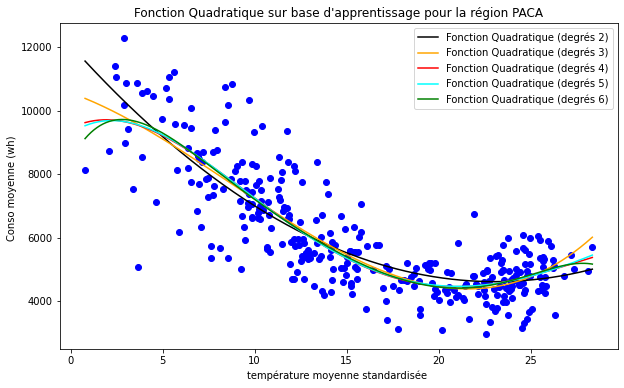

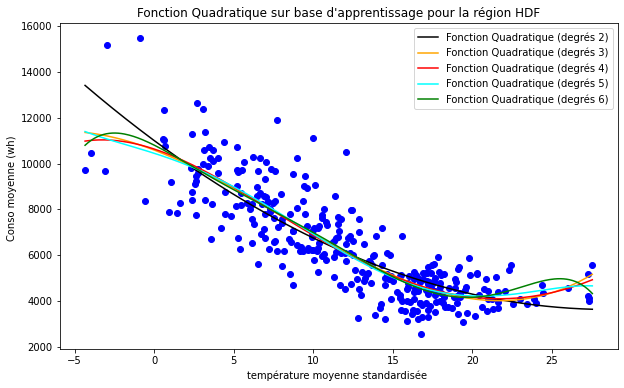

NameError: name 'X_train_PDL' is not defined

In [25]:
## Affichage des résultats des régressions polynomiales pour chaque régions 
plot_poly_IDF = polynomial_plot(X_train_IDF,Y_train_IDF,"IDF")
plot_poly_PACA = polynomial_plot(X_train_PACA,Y_train_PACA,"PACA")
plot_poly_HDF = polynomial_plot(X_train_HDF,Y_train_HDF,"HDF")
plot_poly_PDL = polynomial_plot(X_train_PDL,Y_train_PDL,"PDL")
plot_poly_Normandie = polynomial_plot(X_train_Normandie,Y_train_Normandie,"Normandie")
plot_poly_Occitanie = polynomial_plot(X_train_Occitanie,Y_train_Occitanie,"Occitanie")
plot_poly_Bretagne = polynomial_plot(X_train_Bretagne,Y_train_Bretagne,"Bretagne")
plot_poly_NA = polynomial_plot(X_train_NA,Y_train_NA,'Nouvelle Aquitaine')
plot_poly_GE = polynomial_plot(X_train_GE,Y_train_GE,"Grand Est")
plot_poly_BFC = polynomial_plot(X_train_BFC,Y_train_BFC,"BFC")
plot_poly_ARA = polynomial_plot(X_train_ARA,Y_train_ARA,"ARA")
plot_poly_CVL = polynomial_plot(X_train_CVL,Y_train_CVL,"CVL")

Interprétation :

Graphiquement, la fonction qui semble le mieux fit aux données est celle de degré 2. Afin, de trouver précisemment le degré on calcule les R2.

In [26]:
def reg_poly(n):
    psi = PolynomialFeatures(n,include_bias=False).fit_transform
    return LinearRegression().fit(psi(X_IDF),Y_IDF), psi

In [32]:
mean_train_error = []
mean_test_error = []
n_max = 6
for n in range(1,n_max+1):
    f, psi = reg_poly(n)
    mean_train_error.append(sum((f.predict(psi(X_IDF))-Y_IDF)**2)/m)
    mean_test_error.append(sum((f.predict(psi(X_test_IDF))-Y_test_IDF)**2)/m_test)

plt.plot(range(1,n_max+1),mean_train_error)
plt.plot(range(1,n_max+1),mean_test_error)
plt.axis([0, n_max, 0, .2])
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

La meilleure régression est celle avec la fonction ___

### Classification des R2 pour une regression polynomiale de degré

In [30]:
def reg_sk_poly(X_train,X_test,Y_train,Y_test):
    poly = PolynomialFeatures(degree = 2)
    X_poly = poly.fit_transform(X_train) 
    lm = LinearRegression() 
    lm.fit(X_poly, Y_train) 
    predictions = lm.predict(poly.fit_transform(X_test))
    R2 = metrics.r2_score(Y_test, predictions)
    plt.scatter(Y_test, predictions)
    plt.xlabel('Total energie soutiree du Test sample')
    plt.ylabel('Total energie soutiree prédit par le modèle')
    plt.rcParams["figure.figsize"] = (10,6) 
    plt.title("Total energie soutiree du Test sample Vs Total energie soutiree prédit par le modèle")
    return R2

NameError: name 'X_train_CVL' is not defined

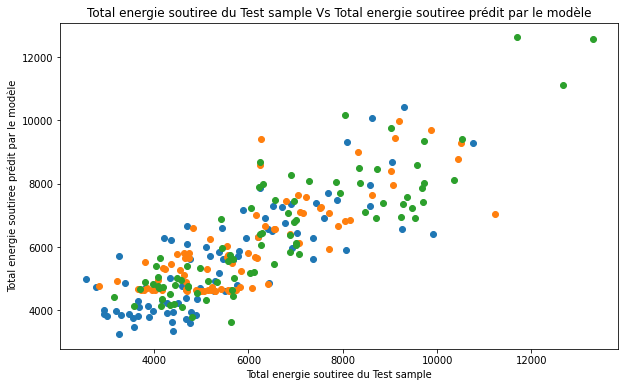

In [31]:
R2_prev_poly_IDF = reg_sk_poly(X_train_IDF,X_test_IDF,Y_train_IDF,Y_test_IDF)
R2_prev_poly_PACA = reg_sk_poly(X_train_PACA,X_test_PACA,Y_train_PACA,Y_test_PACA)
R2_prev_poly_HDF = reg_sk_poly(X_train_HDF,X_test_HDF,Y_train_HDF,Y_test_HDF)
R2_prev_poly_CVL = reg_sk_poly(X_train_CVL,X_test_CVL,Y_train_CVL,Y_test_CVL)
R2_prev_poly_NA = reg_sk_poly(X_train_NA,X_test_NA,Y_train_NA,Y_test_NA)
R2_prev_poly_BFC = reg_sk_poly(X_train_BFC,X_test_BFC,Y_train_BFC,Y_test_BFC)
R2_prev_poly_Bretagne = reg_sk_poly(X_train_Bretagne,X_test_Bretagne,Y_train_Bretagne,Y_test_Bretagne)
R2_prev_poly_Occitanie = reg_sk_poly(X_train_Occitanie,X_test_Occitanie,Y_train_Occitanie,Y_test_Occitanie)
R2_prev_poly_Normandie = reg_sk_poly(X_train_Normandie,X_test_Normandie,Y_train_Normandie,Y_test_Normandie)
R2_prev_poly_ARA = reg_sk_poly(X_train_ARA,X_test_ARA,Y_train_ARA,Y_test_ARA)
R2_prev_poly_GE = reg_sk_poly(X_train_GE,X_test_GE,Y_train_GE,Y_test_GE)
R2_prev_poly_PDL = reg_sk_poly(X_train_PDL,X_test_PDL,Y_train_PDL,Y_test_PDL)

In [ ]:
liste_R2 = [R2_IDF,R2_PACA,R2_HDF]
liste_region = ['Île-de-France',"Provence-Alpes-Côte d'Azur",'Hauts-de-France']
d={'liste_region':liste_region,"R2":liste_R2}
R2_reg_poly = pd.DataFrame(d)
R2_reg_poly.sort_values("R2",ascending=False,inplace=True)
R2_reg_poly

,liste_region,R2
0,Île-de-France,0.474257
1,Provence-Alpes-Côte d'Azur,0.377686
2,Hauts-de-France,0.368561
